In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
num_samples = 100

In [10]:
x1=np.random.normal(size=num_samples)
x2=np.random.normal(size=num_samples)
eps = np.random.normal(size=num_samples)

In [11]:
theta1=2
theta2=0

In [12]:
y=x1*theta1+x2*theta2+eps

In [13]:
def scale(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x-mean)/std

In [15]:
x1s=scale(x1)
x2s=scale(x2)

In [16]:
ys=y-np.mean(y)

## Ex 1

In [62]:
def mse(y_true,y_pred,axis=0):
    return np.square(y_true-y_pred).mean(axis)

In [46]:
theta=np.linspace(-3,3,500)
theta1, theta2 = np.meshgrid(theta, theta)

In [60]:
def linear_model(theta1,theta2,y_true,x1,x2):
    y_pred=x1*np.expand_dims(theta1,2)+x2*np.expand_dims(theta2,2)
    return mse(y,y_pred,2)

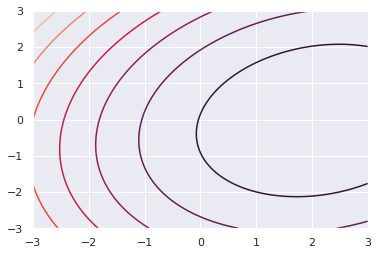

In [64]:
plt.contour(theta1,theta2,linear_model(theta1,theta2,y,x1,x2));

In [69]:
def linear_model_with_L2_reg(theta1,theta2,y_true,x1,x2,lam=4):
    reg = theta1*theta2
    y_pred=x1*np.expand_dims(theta1,2)+x2*np.expand_dims(theta2,2) + lam * reg
    return mse(y,y_pred,2)

In [70]:
def linear_model_with_L1_reg(theta1,theta2,y_true,x1,x2,lam=4):
    reg = abs(theta1)+abs(theta2)
    y_pred=x1*np.expand_dims(theta1,2)+x2*np.expand_dims(theta2,2) + lam * reg
    return mse(y,y_pred,2)

In [71]:
plt.contour(theta1,theta2,linear_model_with_L1_reg(theta1,theta2,y,x1,x2));

ValueError: operands could not be broadcast together with shapes (500,500,100) (500,500) 

In [72]:
reg = theta1*theta2
reg.shape

(500, 500)

In [73]:
y_pred=x1*np.expand_dims(theta1,2)+x2*np.expand_dims(theta2,2)
y_pred.shape

(500, 500, 100)